In [21]:
import os
import pandas as pd

# Define the path to the dataset
main_folder = '/kaggle/input/dfuc-2021-split/A NEW DATASET SPLIT/train'

#manually list subfolders
#categories = ['none', 'infection', 'ischaemia', 'both']

# Dynamically list subfolders in the train folder to use as categories
categories = [folder for folder in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, folder))]

# Count the number of images in each category
image_counts = {category: len(os.listdir(os.path.join(main_folder, category))) for category in categories}

# Convert counts to DataFrame for easy display
df_image_counts = pd.DataFrame(list(image_counts.items()), columns=['Category', 'Image_Count'])
print(df_image_counts)


    Category  Image_Count
0  infection         3066
1       both         3348
2  ischaemia         3128
3       none         3062


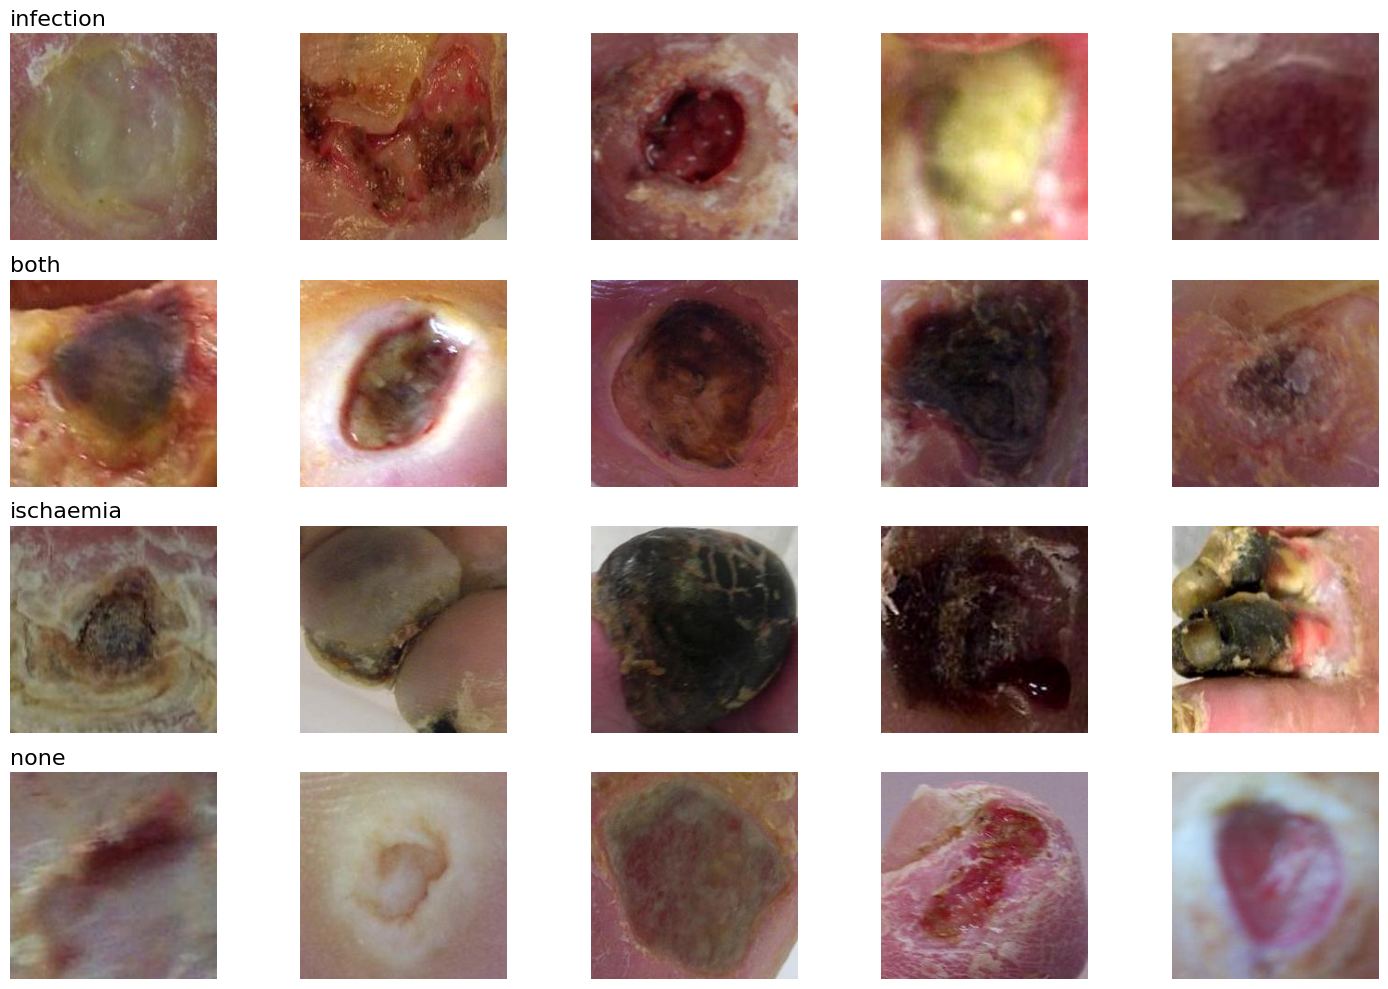

In [23]:
import matplotlib.pyplot as plt
import random
from PIL import Image


# Create a function to load and display images
def plot_images_from_categories(categories, main_folder, num_images=5):
    # Create subplots with 4 rows (for categories) and num_images columns
    fig, axs = plt.subplots(len(categories), num_images, figsize=(15, 10))

    for i, category in enumerate(categories):
        # Path to the category folder
        category_path = os.path.join(main_folder, category)
        
        # List all files in the category folder
        image_files = os.listdir(category_path)
        
        # Randomly select num_images from the folder
        selected_images = random.sample(image_files, num_images)
        
        for j, image_name in enumerate(selected_images):
            image_path = os.path.join(category_path, image_name)
            
            # Open and display the image
            img = Image.open(image_path)
            axs[i, j].imshow(img)
            axs[i, j].axis('off')  # Hide axes for cleaner visualization
            if j == 0:  # Label the first image in each row with the category name
                axs[i, j].set_title(category, fontsize=16, loc='left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the images
plot_images_from_categories(categories, main_folder)


# Image Resolution Check

In [7]:


# Check image resolutions with error handling and category information
def check_image_resolutions(main_folder, categories):
    resolutions = []
    
    for category in categories:
        category_path = os.path.join(main_folder, category)
        
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            try:
                with Image.open(image_path) as img:
                    # Append width, height, and category to the list
                    resolutions.append((img.size[0], img.size[1], category))
            except IOError:
                print(f"Could not open file {image_name} in {category_path}")

    # Convert list to DataFrame with Category column included
    return pd.DataFrame(resolutions, columns=['Width', 'Height', 'Category'])

# Get resolutions of all images with category information
image_resolutions_df = check_image_resolutions(main_folder, categories)

# Print a summary of the image resolutions
print(image_resolutions_df.describe())

# Display grouped statistics by category (optional)
print(image_resolutions_df.groupby('Category').describe())


         Width   Height
count  12604.0  12604.0
mean     224.0    224.0
std        0.0      0.0
min      224.0    224.0
25%      224.0    224.0
50%      224.0    224.0
75%      224.0    224.0
max      224.0    224.0
            Width                                                 Height  \
            count   mean  std    min    25%    50%    75%    max   count   
Category                                                                   
both       3348.0  224.0  0.0  224.0  224.0  224.0  224.0  224.0  3348.0   
infection  3066.0  224.0  0.0  224.0  224.0  224.0  224.0  224.0  3066.0   
ischaemia  3128.0  224.0  0.0  224.0  224.0  224.0  224.0  224.0  3128.0   
none       3062.0  224.0  0.0  224.0  224.0  224.0  224.0  224.0  3062.0   

                                                          
            mean  std    min    25%    50%    75%    max  
Category                                                  
both       224.0  0.0  224.0  224.0  224.0  224.0  224.0  
infection  224.

Here’s what each value means:

* Count (12604): You have a total of 12,604 images in your dataset.
 
* Mean (224 for both Width and Height): The average width and height of all images is 224 pixels. This suggests that all the images in the dataset are likely of the same size, 224x224 pixels.

* Standard Deviation (std 0.0): A standard deviation of 0 means that there is no variability in the image dimensions. All images are exactly the same size (224x224 pixels).

* Min, 25%, 50%, 75%, Max: These values represent the minimum, first quartile (25%), median (50%), third quartile (75%), and maximum dimensions of the images. Since all of these values are 224, it confirms that every image in your dataset has the exact dimensions of 224x224 pixels.

# Pixel Density Distribution

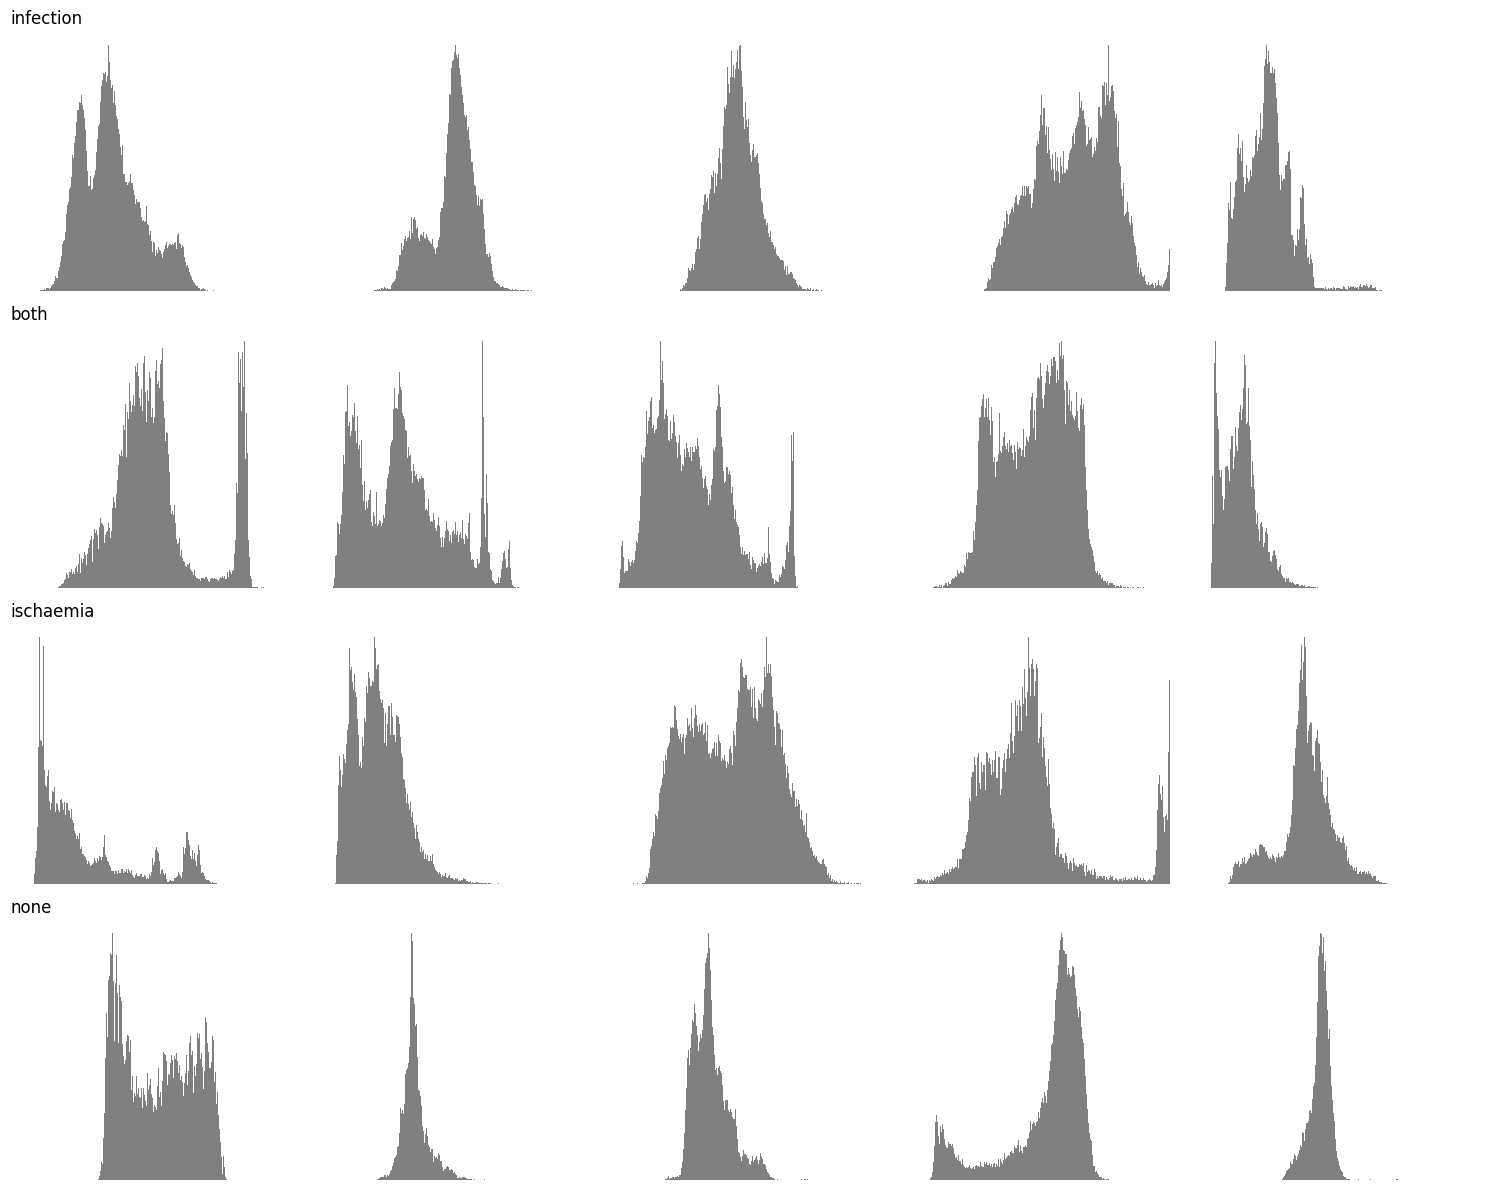

In [10]:
import numpy as np 

# Plot pixel intensity histograms with error handling and labeling
def plot_pixel_intensity_histograms(main_folder, categories, num_images=5):
    fig, axs = plt.subplots(len(categories), num_images, figsize=(num_images * 3, len(categories) * 3))
    
    for i, category in enumerate(categories):
        category_path = os.path.join(main_folder, category)
        image_files = os.listdir(category_path)
        
        # Handle cases with fewer images than requested
        if len(image_files) < num_images:
            print(f"Warning: {category} has only {len(image_files)} images available.")
            selected_images = image_files
        else:
            selected_images = random.sample(image_files, num_images)
        
        for j, image_name in enumerate(selected_images):
            image_path = os.path.join(category_path, image_name)
            try:
                # Open and convert the image to grayscale
                img = Image.open(image_path).convert('L')
                img_array = np.array(img).flatten()
                
                # Plot histogram
                axs[i, j].hist(img_array, bins=256, range=(0, 255), color='gray')
                axs[i, j].axis('off')
                
                # Add category label to the first column in each row
                if j == 0:
                    axs[i, j].set_title(category, fontsize=12, loc='left')
            except Exception as e:
                print(f"Could not process image {image_name} in category {category}: {e}")
                axs[i, j].axis('off')  # Leave the plot blank if image fails to load
    
    plt.tight_layout()
    plt.show()

# Call the function to plot histograms
plot_pixel_intensity_histograms(main_folder, categories)


            count       mean        std       min        25%        50%  \
Category                                                                  
both       3348.0  38.970388  13.559104  8.216941  29.530310  37.291740   
infection  3066.0  27.912654  10.241458  6.002098  20.419382  26.511560   
ischaemia  3128.0  41.906561  14.716267  9.283277  31.363515  40.586434   
none       3062.0  23.285510  10.074366  3.592756  16.147493  21.620559   

                 75%        max  
Category                         
both       46.662075  93.700279  
infection  33.684661  73.127902  
ischaemia  50.653942  98.374736  
none       28.773991  87.858746  


<Figure size 1000x600 with 0 Axes>

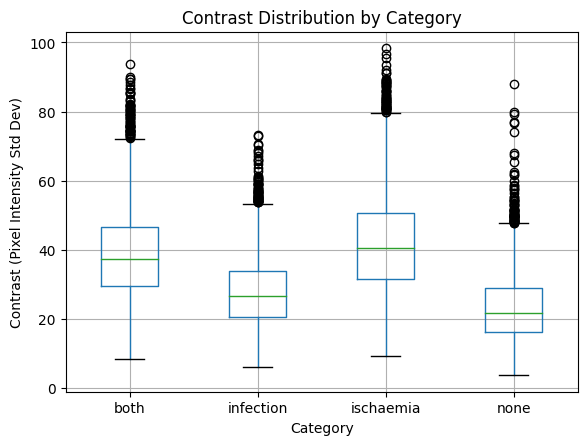

In [11]:
# Function to compute contrast (std of pixel intensities)
def compute_image_contrast(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_array = np.array(img)
    return np.std(img_array)  # Standard deviation of pixel intensities

# Compute contrast for all images and store in a DataFrame
contrast_data = []

for category in categories:
    category_path = os.path.join(main_folder, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        contrast = compute_image_contrast(image_path)
        contrast_data.append({'Category': category, 'Image': image_name, 'Contrast': contrast})

# Convert to DataFrame for easy analysis
df_contrast = pd.DataFrame(contrast_data)

# Calculate summary statistics for each category
contrast_summary = df_contrast.groupby('Category')['Contrast'].describe()
print(contrast_summary)

# Plot the contrast distribution for each category using boxplots
plt.figure(figsize=(10, 6))
df_contrast.boxplot(column='Contrast', by='Category')
plt.title('Contrast Distribution by Category')
plt.suptitle('')
plt.ylabel('Contrast (Pixel Intensity Std Dev)')
plt.show()


# ANOVA Test

ANOVA test allows us to statistically confirm that contrast varies significantly among categories

In [12]:
from scipy import stats

# Run ANOVA to test for differences in contrast between categories
f_stat, p_value = stats.f_oneway(
    df_contrast[df_contrast['Category'] == 'none']['Contrast'],
    df_contrast[df_contrast['Category'] == 'infection']['Contrast'],
    df_contrast[df_contrast['Category'] == 'ischaemia']['Contrast'],
    df_contrast[df_contrast['Category'] == 'both']['Contrast']
)

print(f"F-statistic: {f_stat}, p-value: {p_value}")


F-statistic: 1604.5254820485727, p-value: 0.0


**Interpretation:
p-value (0.0):**

* The p-value is extremely small (close to zero), which means that the contrast differences between the categories (none, infection, ischaemia, and both) are statistically significant.

* This indicates that at least one of the categories has a significantly different mean contrast compared to the others. In simpler terms, the variation in contrast across the categories is not due to random chance—it is meaningful and could potentially impact the model’s learning.

**F-statistic (1604.53):**

* The F-statistic measures the ratio of variance between the group means to the variance within the groups. A high F-statistic, like the one we see here, indicates a large difference between group means relative to the variability within each group.


Given these differences in contrast, we can apply preprocessing steps like contrast normalization to make sure that the model doesn't become biased!

## Contrast Normalization

Apply contrast normalization techniques to ensure that the model doesn't overfit to the contrast differences between categories. Here are a few common techniques:

* Histogram Equalization: Adjusts the contrast of images by distributing pixel intensity values more uniformly across the available range. This is useful if some images are darker or brighter than others.

* Contrast Limited Adaptive Histogram Equalization (CLAHE): Similar to histogram equalization but applies local adjustments, preserving more details while normalizing contrast. This can be effective if you want to retain finer details in the images.

In [17]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# CLAHE preprocessing function using OpenCV
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

# Custom Dataset class to load images and apply transformations
class DFUC2021Dataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self._prepare_dataset()

    def _prepare_dataset(self):
        # Dynamically get the list of categories from subfolders in root_dir
        categories = [folder for folder in os.listdir(self.root_dir) if os.path.isdir(os.path.join(self.root_dir, folder))]
        label_map = {category: idx for idx, category in enumerate(categories)}

        # Loop over each category folder to get the image paths and labels
        for category in categories:
            category_path = os.path.join(self.root_dir, category)
            for image_name in os.listdir(category_path):
                image_path = os.path.join(category_path, image_name)
                self.image_paths.append(image_path)
                self.labels.append(label_map[category])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image in color (3-channel BGR format with OpenCV)
        img_path = self.image_paths[idx]
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)

        # Split into B, G, R channels
        b, g, r = cv2.split(img)

        # Apply CLAHE to each channel
        b = apply_clahe(b)
        g = apply_clahe(g)
        r = apply_clahe(r)

        # Merge channels back
        img = cv2.merge((b, g, r))

        # Convert to RGB format (OpenCV loads in BGR by default)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Convert to PIL Image for PyTorch transforms
        img = Image.fromarray(img)

        # Apply additional transformations (e.g., resize, normalization)
        if self.transform:
            img = self.transform(img)

        # Return the processed image and its label
        label = self.labels[idx]
        return img, label

# Define any transformations to apply after CLAHE (resize, normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),            # Resize to 224x224 for training
    transforms.ToTensor(),                    # Convert PIL image to PyTorch tensor
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize RGB values
])



## Data Generator 

In [18]:
# Instantiate the datasets for train and validation
train_dir = '/kaggle/input/dfuc-2021-split/A NEW DATASET SPLIT/train'  # Replace with your path
val_dir = '/kaggle/input/dfuc-2021-split/A NEW DATASET SPLIT/valid'      # Replace with your path
test_dir = '/kaggle/input/dfuc-2021-split/A NEW DATASET SPLIT/test'

train_dataset = DFUC2021Dataset(root_dir=train_dir, transform=transform)
val_dataset = DFUC2021Dataset(root_dir=val_dir, transform=transform)
test_dataset = DFUC2021Dataset(root_dir=test_dir, transform=transform)

# Use DataLoader to create mini-batches
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

In [25]:
import collections

def get_image_distribution(dataset):
    # Use the dataset's labels to count occurrences of each category
    label_counts = collections.Counter(dataset.labels)
    
    # Mapping of numeric labels back to category names
    category_map = {0: 'none', 1: 'infection', 2: 'ischaemia', 3: 'both'}
    
    # Print the distribution
    for label, count in label_counts.items():
        print(f"* {category_map[label]}: {count}")

# Check distribution in train dataset
print("Train Dataset Distribution:")
get_image_distribution(train_dataset)

# Check distribution in validation dataset
print("\nValidation Dataset Distribution:")
get_image_distribution(val_dataset)

# Check distribution in validation dataset
print("\n Test Dataset Distribution:")
get_image_distribution(test_dataset)


Train Dataset Distribution:
* none: 3066
* infection: 3348
* ischaemia: 3128
* both: 3062

Validation Dataset Distribution:
* none: 1022
* infection: 1116
* ischaemia: 1035
* both: 1020

 Test Dataset Distribution:
* none: 511
* infection: 125
* ischaemia: 46
* both: 511


Train Dataset Samples


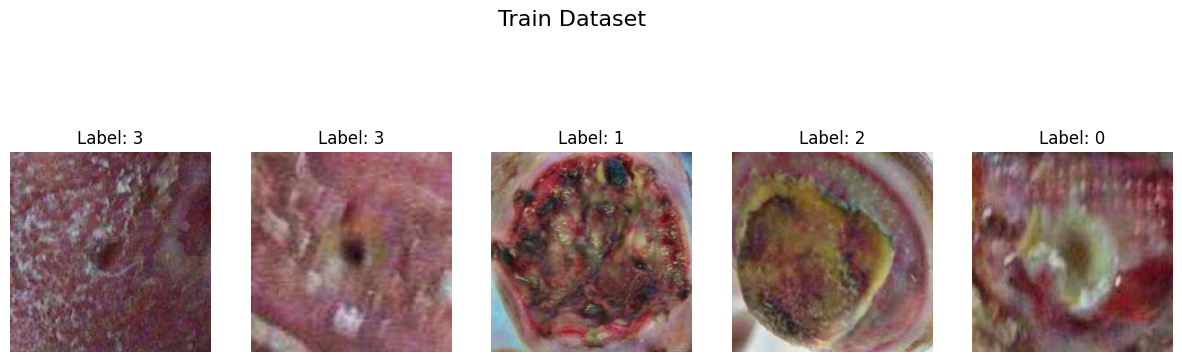


Validation Dataset Samples


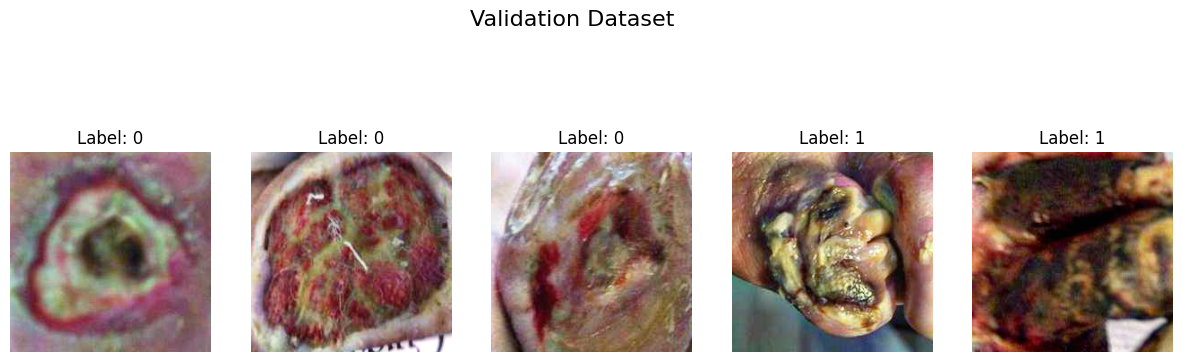


Test Dataset Samples


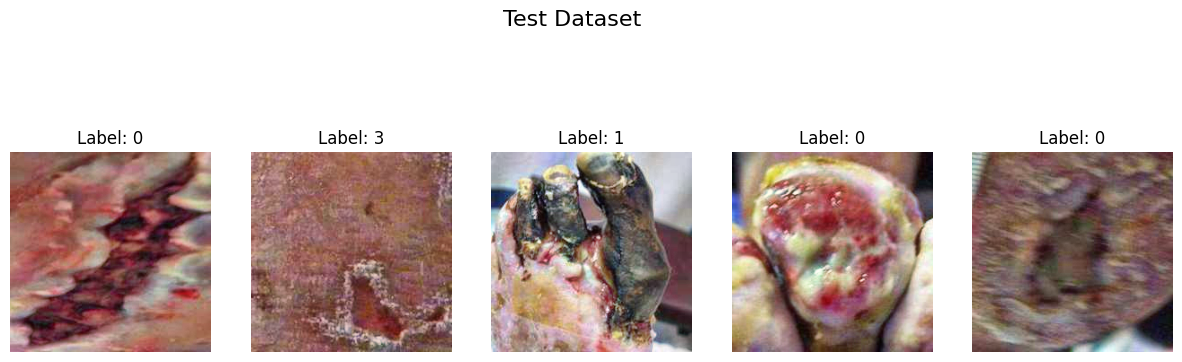

In [20]:
import matplotlib.pyplot as plt
import random

# Function to display random images from a dataset
def display_random_images(dataset, num_images=5, title="Dataset Samples"):
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    
    for i in range(num_images):
        idx = random.randint(0, len(dataset) - 1)  # Random index
        img, label = dataset[idx]                  # Get image and label
        
        # Convert the tensor to a numpy array and transpose to H x W x C for matplotlib
        img = img.permute(1, 2, 0).numpy()         # Convert to numpy and adjust channels
        img = img * 0.5 + 0.5                      # Unnormalize to [0, 1] range for display
        
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f"Label: {label}")

    plt.show()

# Display images from each dataset
print("Train Dataset Samples")
display_random_images(train_dataset, title="Train Dataset")

print("\nValidation Dataset Samples")
display_random_images(val_dataset, title="Validation Dataset")

print("\nTest Dataset Samples")
display_random_images(test_dataset, title="Test Dataset")


# Model Training 


In [36]:
# Check if CUDA is available and set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # Use cuda:0 explicitly

In [33]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load DenseNet121 without pretrained weights
model = models.densenet121(pretrained=False)

# Modify the first convolutional layer to accept 3-channel (RGB) input
model.features.conv0 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Modify the final classification layer
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 4)  # Assuming 4 classes

# Move the model to the device (GPU or CPU)
model = model.to(device)


# Function to calculate total parameters and model size
def get_model_summary(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    non_trainable_params = total_params - trainable_params
    
    model_size_in_bytes = sum(p.element_size() * p.numel() for p in model.parameters())
    model_size_in_mb = model_size_in_bytes / (1024 ** 2)  # Convert to megabytes

    print(f"Total Parameters: {total_params}")
    print(f"Trainable Parameters: {trainable_params}")
    print(f"Non-trainable Parameters: {non_trainable_params}")
    print(f"Model Size: {model_size_in_mb:.2f} MB")

# Move the model to the device and wrap with DataParallel for multi-GPU usage
model = model.to(device)
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)
    
# Get the summary of the model
get_model_summary(model)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Total Parameters: 6957956
Trainable Parameters: 6957956
Non-trainable Parameters: 0
Model Size: 26.54 MB


In [37]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from tqdm import tqdm  # For progress tracking


# Hyperparameters
learning_rate = 0.001
batch_size = 32
num_epochs = 50
weight_decay = 1e-4  # L2 regularization
patience = 10  # For early stopping

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Adaptive Learning Rate Scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# Early Stopping Implementation
class EarlyStopping:
    def __init__(self, patience=5):
        self.patience = patience
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

early_stopping = EarlyStopping(patience=patience)

# Path to save the best model weights
best_model_path = 'densenet121_best_model.pth'

# Train and validate the model
def train_and_evaluate(model, train_loader, val_loader, num_epochs):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        # Training loop with progress bar
        with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}") as progress:
            for images, labels in progress:
                # Move images and labels to the correct device
                images, labels = images.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                # Update running metrics
                running_loss += loss.item()
                _, predicted = outputs.max(1)
                correct += predicted.eq(labels).sum().item()
                total += labels.size(0)
                progress.set_postfix(loss=loss.item(), acc=100. * correct / total)

        # Compute training loss and accuracy
        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation loop
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                correct += predicted.eq(labels).sum().item()
                total += labels.size(0)

        # Compute validation loss and accuracy
        val_loss /= len(val_loader)
        val_acc = 100. * correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        # Show progress
        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        # Adjust learning rate
        scheduler.step(val_loss)

        # Save the best model based on validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), best_model_path)
            print(f"Best model saved with Val Loss: {val_loss:.4f}")

        # Check early stopping
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered!")
            break

    return train_losses, val_losses, train_accuracies, val_accuracies


# Function to evaluate on the test set and print classification report & confusion matrix, including sensitivity
def evaluate_test_set(model, test_loader, class_names):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Classification report
    print("Classification Report:")
    report = classification_report(all_labels, all_preds, target_names=class_names, output_dict=True)
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Sensitivity (Recall) for each class
    print("\nSensitivity (Recall) for each class:")
    for class_name in class_names:
        sensitivity = report[class_name]['recall']
        print(f"{class_name}: {sensitivity:.2f}")

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()


# Function to visualize predictions with confidence
# Function to visualize predictions with confidence
def visualize_predictions_with_confidence(model, test_loader, class_names):
    model.eval()
    images_per_class = {class_name: 0 for class_name in class_names}
    max_images = 3  # Number of images to visualize per class
    fig, axes = plt.subplots(len(class_names), max_images, figsize=(12, 8))

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = nn.Softmax(dim=1)(outputs)  # Get probabilities using softmax
            _, preds = torch.max(probs, 1)
            
            for i in range(images.size(0)):
                label = labels[i].cpu().item()
                pred = preds[i].cpu().item()
                prob = probs[i][pred].cpu().item()

                # If we haven't visualized enough images for this class, visualize
                if images_per_class[class_names[label]] < max_images:
                    ax = axes[label, images_per_class[class_names[label]]]
                    # Convert image to (H, W, C) and display as RGB or grayscale if single channel
                    img = images[i].cpu().permute(1, 2, 0).numpy()

                    if img.shape[2] == 1:  # Grayscale image
                        img = img.squeeze()  # Remove the last dimension if it's grayscale
                        ax.imshow(img, cmap='gray')  # Show as grayscale
                    else:
                        ax.imshow(img)  # Show as color

                    ax.axis('off')
                    # Set title with ground truth, predicted class, and confidence score
                    ax.set_title(f"GT: {class_names[label]}\nPred: {class_names[pred]}\nConf: {prob:.2f}")
                    images_per_class[class_names[label]] += 1

            # Stop if we've visualized enough images
            if all(count >= max_images for count in images_per_class.values()):
                break
    
    plt.tight_layout()
    plt.show()

    
# Function to plot training and validation loss and accuracy curves
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot Loss
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()



In [38]:
train_losses, val_losses, train_accuracies, val_accuracies = train_and_evaluate(model, train_loader, val_loader, num_epochs)


Epoch 1/50: 100%|██████████| 394/394 [01:59<00:00,  3.29it/s, acc=63.9, loss=0.71] 


Epoch [1/50] - Train Loss: 0.8139, Train Acc: 63.94%, Val Loss: 0.7532, Val Acc: 66.06%
Best model saved with Val Loss: 0.7532


Epoch 2/50: 100%|██████████| 394/394 [02:00<00:00,  3.27it/s, acc=66.9, loss=0.614]


Epoch [2/50] - Train Loss: 0.7580, Train Acc: 66.86%, Val Loss: 0.9452, Val Acc: 63.44%


Epoch 3/50: 100%|██████████| 394/394 [01:58<00:00,  3.31it/s, acc=69.9, loss=0.61] 


Epoch [3/50] - Train Loss: 0.6941, Train Acc: 69.87%, Val Loss: 0.7842, Val Acc: 69.85%


Epoch 4/50: 100%|██████████| 394/394 [01:59<00:00,  3.30it/s, acc=71.6, loss=0.709]


Epoch [4/50] - Train Loss: 0.6705, Train Acc: 71.56%, Val Loss: 0.7949, Val Acc: 66.32%


Epoch 5/50: 100%|██████████| 394/394 [01:59<00:00,  3.30it/s, acc=73.2, loss=0.532]


Epoch [5/50] - Train Loss: 0.6362, Train Acc: 73.17%, Val Loss: 0.6891, Val Acc: 72.43%
Best model saved with Val Loss: 0.6891


Epoch 6/50: 100%|██████████| 394/394 [01:59<00:00,  3.28it/s, acc=74.4, loss=0.584]


Epoch [6/50] - Train Loss: 0.6064, Train Acc: 74.41%, Val Loss: 0.8785, Val Acc: 64.75%


Epoch 7/50: 100%|██████████| 394/394 [02:00<00:00,  3.28it/s, acc=75.2, loss=0.509]


Epoch [7/50] - Train Loss: 0.5846, Train Acc: 75.19%, Val Loss: 0.7876, Val Acc: 65.42%


Epoch 8/50: 100%|██████████| 394/394 [01:59<00:00,  3.29it/s, acc=76.3, loss=0.503]


Epoch [8/50] - Train Loss: 0.5615, Train Acc: 76.32%, Val Loss: 0.7687, Val Acc: 68.90%


Epoch 9/50: 100%|██████████| 394/394 [01:59<00:00,  3.29it/s, acc=77.5, loss=0.462]


Epoch [9/50] - Train Loss: 0.5312, Train Acc: 77.47%, Val Loss: 0.5981, Val Acc: 75.24%
Best model saved with Val Loss: 0.5981


Epoch 10/50: 100%|██████████| 394/394 [02:00<00:00,  3.26it/s, acc=78.4, loss=0.559]


Epoch [10/50] - Train Loss: 0.5116, Train Acc: 78.38%, Val Loss: 0.8686, Val Acc: 68.14%


Epoch 11/50: 100%|██████████| 394/394 [02:00<00:00,  3.28it/s, acc=78.6, loss=0.541]


Epoch [11/50] - Train Loss: 0.4977, Train Acc: 78.64%, Val Loss: 0.6821, Val Acc: 71.74%


Epoch 12/50: 100%|██████████| 394/394 [02:00<00:00,  3.28it/s, acc=80.2, loss=0.688]


Epoch [12/50] - Train Loss: 0.4726, Train Acc: 80.19%, Val Loss: 0.7323, Val Acc: 70.38%


Epoch 13/50: 100%|██████████| 394/394 [01:59<00:00,  3.29it/s, acc=80.6, loss=0.323]


Epoch [13/50] - Train Loss: 0.4570, Train Acc: 80.60%, Val Loss: 0.6642, Val Acc: 74.41%


Epoch 14/50: 100%|██████████| 394/394 [01:59<00:00,  3.30it/s, acc=84.2, loss=0.294]


Epoch [14/50] - Train Loss: 0.3727, Train Acc: 84.16%, Val Loss: 0.5746, Val Acc: 77.84%
Best model saved with Val Loss: 0.5746


Epoch 15/50: 100%|██████████| 394/394 [01:59<00:00,  3.30it/s, acc=85.3, loss=0.282]


Epoch [15/50] - Train Loss: 0.3414, Train Acc: 85.27%, Val Loss: 0.5441, Val Acc: 78.89%
Best model saved with Val Loss: 0.5441


Epoch 16/50: 100%|██████████| 394/394 [01:59<00:00,  3.29it/s, acc=85.8, loss=0.293]


Epoch [16/50] - Train Loss: 0.3363, Train Acc: 85.79%, Val Loss: 0.5489, Val Acc: 78.99%


Epoch 17/50: 100%|██████████| 394/394 [01:59<00:00,  3.29it/s, acc=86.3, loss=0.628]


Epoch [17/50] - Train Loss: 0.3242, Train Acc: 86.29%, Val Loss: 0.5756, Val Acc: 78.11%


Epoch 18/50: 100%|██████████| 394/394 [01:59<00:00,  3.30it/s, acc=86.5, loss=0.371]


Epoch [18/50] - Train Loss: 0.3134, Train Acc: 86.49%, Val Loss: 0.5910, Val Acc: 77.84%


Epoch 19/50: 100%|██████████| 394/394 [01:59<00:00,  3.30it/s, acc=87.5, loss=0.254]


Epoch [19/50] - Train Loss: 0.3000, Train Acc: 87.52%, Val Loss: 0.5761, Val Acc: 78.63%


Epoch 20/50: 100%|██████████| 394/394 [01:58<00:00,  3.31it/s, acc=88.3, loss=0.308]


Epoch [20/50] - Train Loss: 0.2799, Train Acc: 88.27%, Val Loss: 0.5581, Val Acc: 79.44%


Epoch 21/50: 100%|██████████| 394/394 [01:58<00:00,  3.31it/s, acc=88, loss=0.14]   


Epoch [21/50] - Train Loss: 0.2786, Train Acc: 87.99%, Val Loss: 0.5147, Val Acc: 80.49%
Best model saved with Val Loss: 0.5147


Epoch 22/50: 100%|██████████| 394/394 [01:58<00:00,  3.32it/s, acc=88.6, loss=0.298] 


Epoch [22/50] - Train Loss: 0.2755, Train Acc: 88.55%, Val Loss: 0.5368, Val Acc: 79.47%


Epoch 23/50: 100%|██████████| 394/394 [01:58<00:00,  3.33it/s, acc=88.4, loss=0.319] 


Epoch [23/50] - Train Loss: 0.2765, Train Acc: 88.37%, Val Loss: 0.5567, Val Acc: 79.01%


Epoch 24/50: 100%|██████████| 394/394 [01:58<00:00,  3.33it/s, acc=88.5, loss=0.243] 


Epoch [24/50] - Train Loss: 0.2718, Train Acc: 88.51%, Val Loss: 0.5694, Val Acc: 78.34%


Epoch 25/50: 100%|██████████| 394/394 [01:58<00:00,  3.32it/s, acc=88.7, loss=0.303] 


Epoch [25/50] - Train Loss: 0.2710, Train Acc: 88.71%, Val Loss: 0.5666, Val Acc: 79.39%


Epoch 26/50: 100%|██████████| 394/394 [01:58<00:00,  3.31it/s, acc=88.6, loss=0.198] 


Epoch [26/50] - Train Loss: 0.2723, Train Acc: 88.61%, Val Loss: 0.5593, Val Acc: 79.44%


Epoch 27/50: 100%|██████████| 394/394 [01:58<00:00,  3.32it/s, acc=88.7, loss=0.291]


Epoch [27/50] - Train Loss: 0.2698, Train Acc: 88.66%, Val Loss: 0.5378, Val Acc: 80.04%


Epoch 28/50: 100%|██████████| 394/394 [01:58<00:00,  3.32it/s, acc=88.6, loss=0.4]   


Epoch [28/50] - Train Loss: 0.2681, Train Acc: 88.62%, Val Loss: 0.5360, Val Acc: 79.85%


Epoch 29/50: 100%|██████████| 394/394 [01:59<00:00,  3.30it/s, acc=88.6, loss=0.353] 


Epoch [29/50] - Train Loss: 0.2737, Train Acc: 88.65%, Val Loss: 0.5547, Val Acc: 79.42%


Epoch 30/50: 100%|██████████| 394/394 [01:58<00:00,  3.31it/s, acc=88.4, loss=0.346] 


Epoch [30/50] - Train Loss: 0.2728, Train Acc: 88.44%, Val Loss: 0.5567, Val Acc: 79.73%


Epoch 31/50: 100%|██████████| 394/394 [01:57<00:00,  3.34it/s, acc=88.7, loss=0.295] 


Epoch [31/50] - Train Loss: 0.2716, Train Acc: 88.70%, Val Loss: 0.5699, Val Acc: 79.18%
Early stopping triggered!


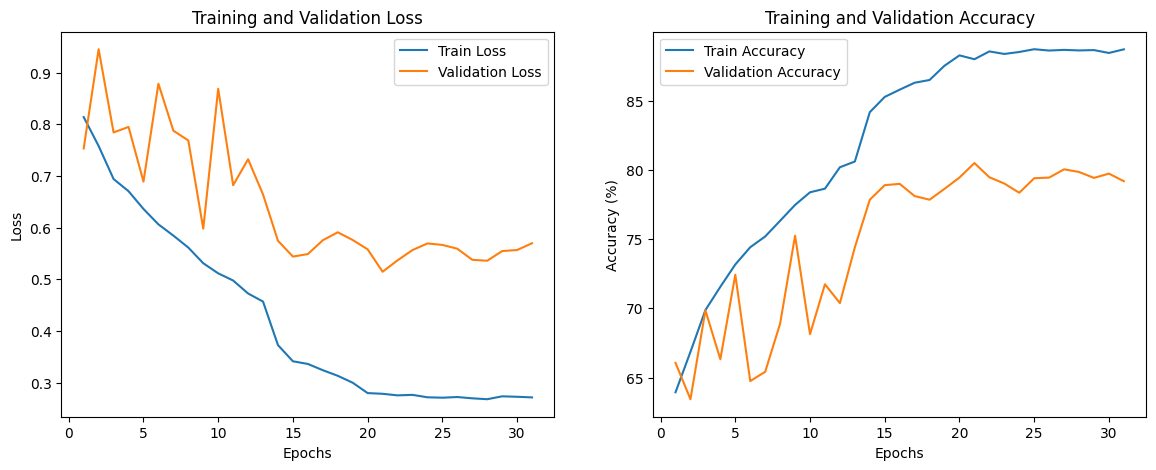

In [39]:
# Example usage after training:
class_names = ['none', 'infection', 'ischaemia', 'both']  # Replace with your actual class names

# Assuming you have a test_loader for test images
plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)


Classification Report:
              precision    recall  f1-score   support

        none       0.76      0.70      0.73       511
   infection       0.78      0.84      0.81       125
   ischaemia       0.72      0.74      0.73        46
        both       0.74      0.78      0.76       511

    accuracy                           0.75      1193
   macro avg       0.75      0.76      0.76      1193
weighted avg       0.75      0.75      0.75      1193


Sensitivity (Recall) for each class:
none: 0.70
infection: 0.84
ischaemia: 0.74
both: 0.78


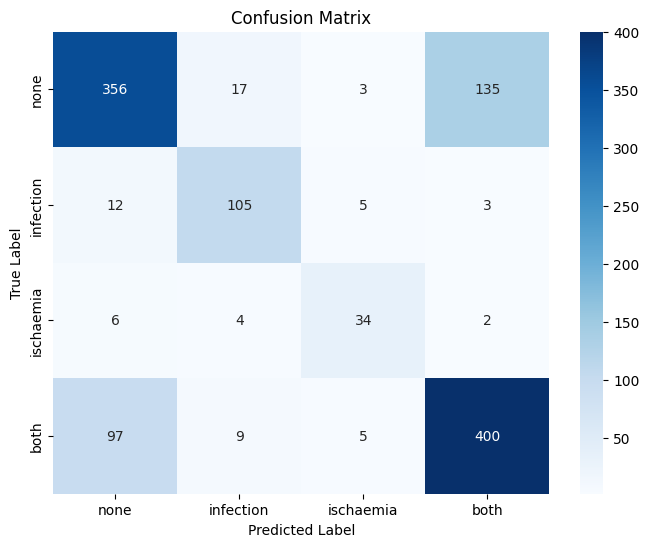

In [40]:
evaluate_test_set(model, test_loader, class_names)


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


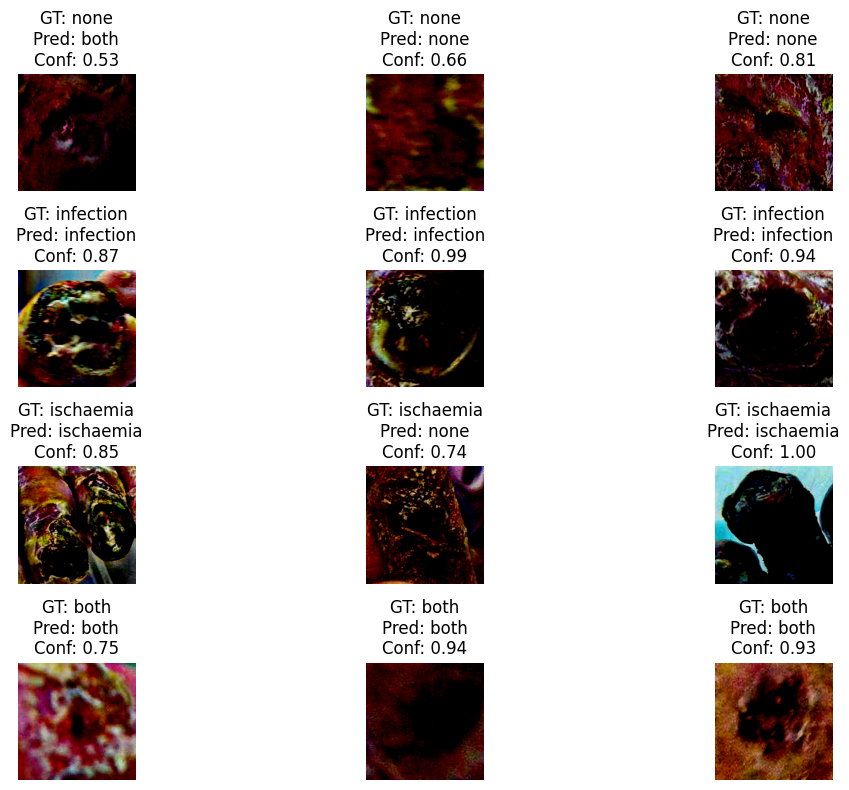

In [41]:
visualize_predictions_with_confidence(model, test_loader, class_names)